#Permite chequear que los XMLs asociados a las imágenes no tengan errores y visualizar los box para comprobar que sean correctos:


1) Cargar librerías:

In [1]:
#@title Cargar Librerías
from IPython.display import Image, display
from PIL import Image as ImPIL
import numpy as np
import os
import cv2
import os.path
import datetime

import tensorflow as tf
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

import xml.etree.cElementTree as ET

print ("Librerías cargadas.")

Librerías cargadas.


2) Montar el Drive:

In [2]:
#@title
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


3) Llevar a cabo la prueba:

In [3]:
#@title Definir parámetros a utilizar 

#@markdown Parámetros de Archivos:
levantarSoloDA =  False #@param {type:"boolean"}
filtrar_prefijo_inicial_caso_generado = "" #@param {type:"string"}
drive_path = "/content/gdrive/MyDrive/GEMIS/objDetectionCursogramas/Cursogramas/Generados" #@param {type:"string"}

#@markdown Parámetros sobre Controles:
revisarObjetosEncimados = True #@param {type:"boolean"}

#@markdown Parámetros sobre Información a Mostrar:
cantMuestraMostrar =  5#@param {type:"integer"}
mostrarImagenOriginal = False #@param {type:"boolean"}
extraerObjetos = False #@param {type:"boolean"}
mostrarObjetosEnImagen = True #@param {type:"boolean"}
calcularCantTipoObjetos =  True #@param {type:"boolean"}

print("Parámetros definidos.")

import colorsys
# arma lista de colores para los recuados
# (filtra colores más "visibles")
colors = []
for n, c in ImageColor.colormap.items():
  hls = colorsys.rgb_to_hls(*map(lambda _: _ / 255., ImageColor.getrgb(c))  )  
  if hls[0] > 0.3 and hls[1] > 0.3 and hls[2] > 0.3:
    colors.append(c)
#colors = list(ImageColor.colormap.values())
#colors = sorted(colors, key=lambda _: _[0])
colors = sorted(colors)

print("Colores definidos: ", len(colors))

Parámetros definidos.
Colores definidos:  59


In [4]:
#@title Determinar XML a revisar
drive.mount('/content/gdrive', force_remount=True)

# define la carpeta donde están las imágenes para procesar
data_dir_path = drive_path 
image_dir_path = data_dir_path

# levanta los XML  para procesar
all_xml_array = [ fn for fn in os.listdir( data_dir_path ) if fn.endswith('.xml')  ]
if levantarSoloDA and len(all_xml_array)>0:
  all_xml_array = [ fn for fn in all_xml_array if fn.startswith('da')  ]
if filtrar_prefijo_inicial_caso_generado != "" and len(all_xml_array)>0:
  all_xml_array = [ fn for fn in all_xml_array if fn.find('_'+ filtrar_prefijo_inicial_caso_generado +'_')>0 ]

# desordena y toma algunos al azar
if len(all_xml_array)>cantMuestraMostrar:
  np.random.shuffle(all_xml_array)
  mostrar_xml_array, _ = np.split(np.array(all_xml_array), [cantMuestraMostrar])
else:
  mostrar_xml_array = np.array(all_xml_array)

print("> XML a probar: ", len(all_xml_array))
print("> XML a mostrar: ", len(mostrar_xml_array))

if len(mostrar_xml_array) > 0:
  fechasCreacion = [ datetime.datetime.fromtimestamp(os.path.getmtime(data_dir_path + '/' + ar)) for ar in mostrar_xml_array]
  print("> Fechas de creación de XML a mostrar entre ",   min( fechasCreacion ), " y ", max( fechasCreacion ))


Mounted at /content/gdrive
> XML a probar:  3576
> XML a mostrar:  5
> Fechas de creación de XML a mostrar entre  2021-09-08 15:43:47  y  2021-09-08 16:28:21




 1 >  c_SARA_00001f.xml


 2 >  c_SARA_00002r.xml


 3 >  c_SARA_00003fr.xml


 4 >  c_SARA_00004f.xml


 5 >  c_SARA_00005f.xml


 6 >  c_SARA_00006fr.xml


 7 >  c_SARA_00007.xml


 8 >  c_SARA_00008r.xml


 9 >  c_SARA_00009f.xml


 10 >  c_SARA_00010fr.xml


 11 >  c_SARA_00011f.xml


 12 >  c_SARA_00012f.xml


 13 >  c_SARA_00013s.xml


 14 >  c_SARA_00014r.xml


 15 >  c_SARA_00015.xml


 16 >  c_SARA_00016f.xml


 17 >  c_SARA_00017s.xml


 18 >  c_SARA_00018fr.xml


 19 >  c_SARA_00019f.xml


 20 >  c_SARA_00020fr.xml


 21 >  c_SARA_00021.xml


 22 >  c_SARA_00022.xml


 23 >  c_SARA_00023fr.xml


 24 >  c_SARA_00024f.xml


 25 >  c_SARA_00025f.xml


 26 >  c_SARA_00026r.xml


 27 >  c_SARA_00027f.xml


 28 >  c_SARA_00028fr.xml


 29 >  c_SARA_00029f.xml


 30 >  c_SARA_00030f.xml


 31 >  c_SARA_00031.xml


 32 >  c_SARA_00032r.xml


 33 >  c_SARA_00033r.xml


 34 >  c_SARA_00034s.xml


 35 >  c_SARA_00035f.xml


 36 >  c_SARA_00036.xml


 37 >  c_SARA_00037fs.xml


 38 > 

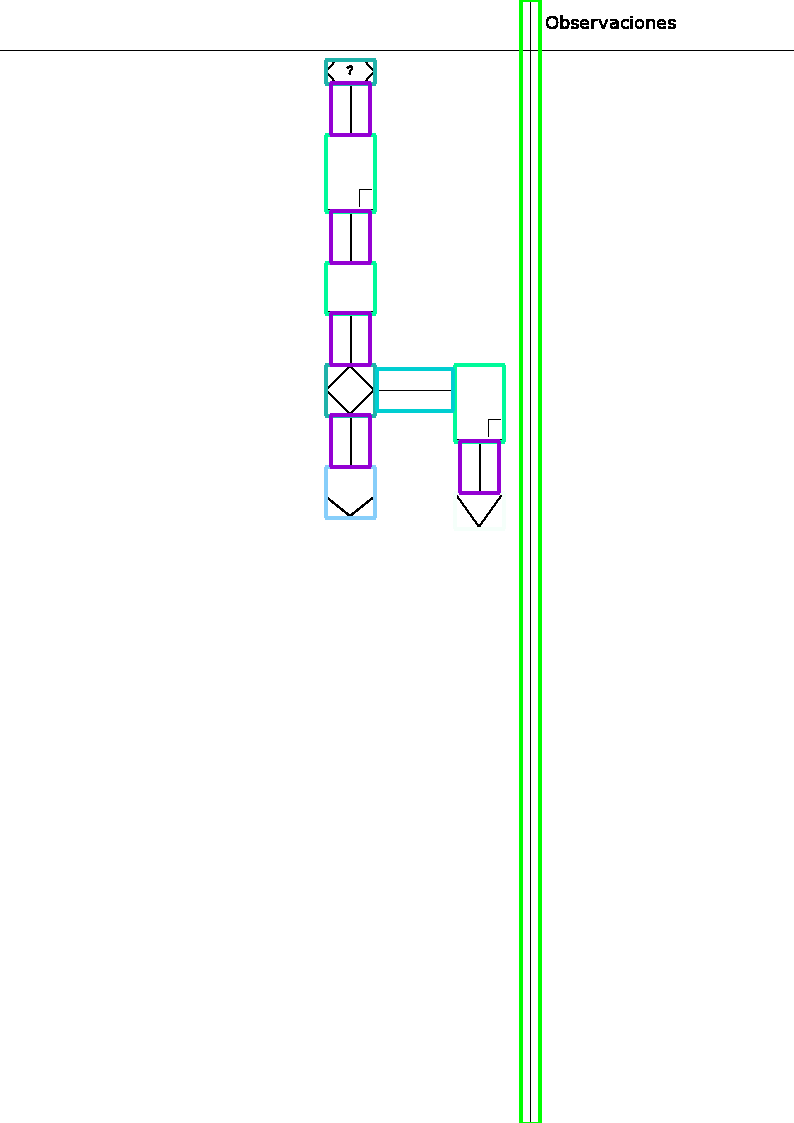



 838 >  c_SFdRV_00058s.xml


 839 >  c_SFdRV_00059fr.xml


 840 >  c_SFdRV_00060fr.xml


 841 >  c_SFdRV_00061r.xml


 842 >  c_SFdRV_00062fr.xml


 843 >  c_SFdRV_00063fr.xml


 844 >  c_SFdRV_00064r.xml


 845 >  c_SFdRV_00065fr.xml


 846 >  c_SFeRA_00001fr.xml


 847 >  c_SFeRA_00002f.xml


 848 >  c_SFeRA_00003f.xml


 849 >  c_SFeRA_00004.xml


 850 >  c_SFeRA_00005fr.xml


 851 >  c_SFeRA_00006r.xml


 852 >  c_SFeRA_00007.xml


 853 >  c_SFeRA_00008fr.xml


 854 >  c_SFeRA_00009f.xml


 855 >  c_SFeRA_00010f.xml


 856 >  c_SFeRA_00011f.xml


 857 >  c_SFeRA_00012f.xml


 858 >  c_SFeRA_00013.xml


 859 >  c_SFeRA_00014.xml


 860 >  c_SFeRA_00015f.xml


 861 >  c_SFeRA_00016r.xml


 862 >  c_SFeRA_00017r.xml


 863 >  c_SFeRA_00018r.xml


 864 >  c_SFeRA_00019r.xml


 865 >  c_SFeRA_00020r.xml


 866 >  c_SFeRA_00021r.xml


 867 >  c_SFeRA_00022fr.xml


 868 >  c_SFeRA_00023f.xml


 869 >  c_SFeRA_00024r.xml


 870 >  c_SFeRA_00025fr.xml


 871 >  c_SFeRA_00026f.xml


 872 >

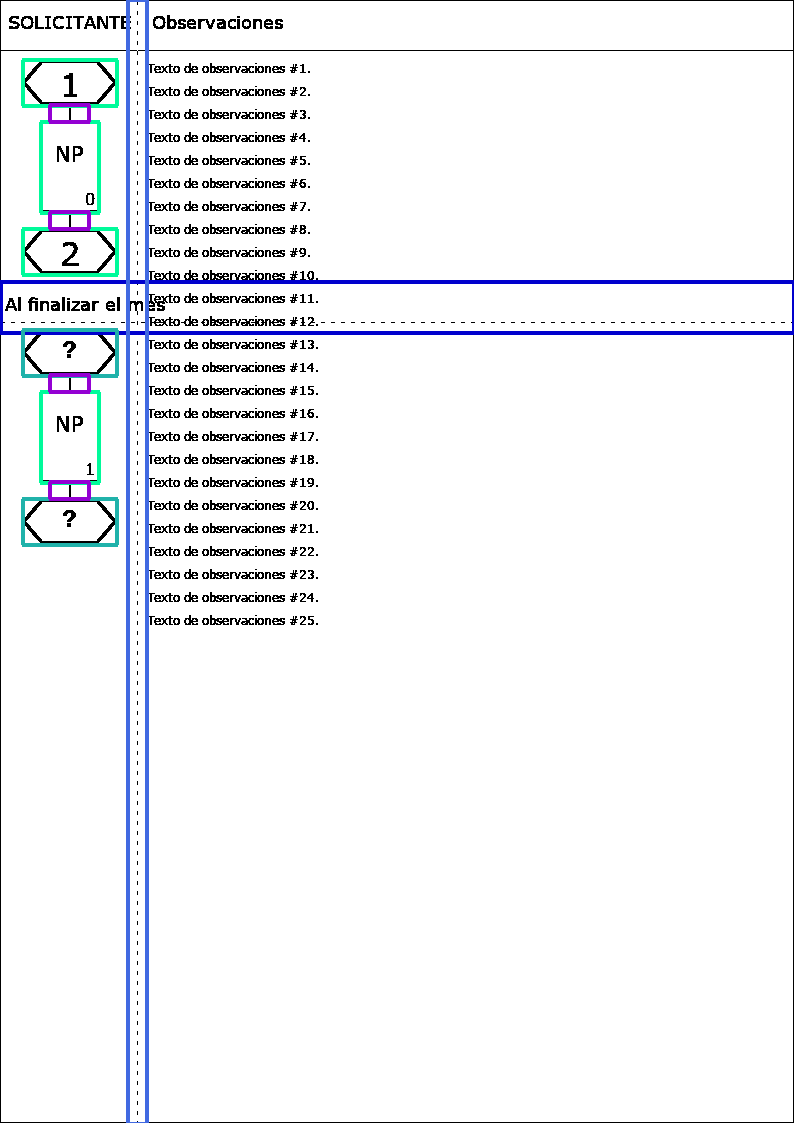



 930 >  c_SFeRS_00020fr.xml


 931 >  c_SFeRS_00021fr.xml


 932 >  c_SFeRS_00022fr.xml


 933 >  c_SFeRS_00023fr.xml


 934 >  c_SFeRS_00024.xml


 935 >  c_SFeRS_00025fr.xml


 936 >  c_SFeRS_00026fr.xml


 937 >  c_SFeRS_00027fr.xml


 938 >  c_SFeRS_00028r.xml


 939 >  c_SFeRS_00029f.xml


 940 >  c_SFeRS_00030fr.xml


 941 >  c_SFeRS_00031.xml


 942 >  c_SFeRS_00032r.xml


 943 >  c_SFeRS_00033fr.xml


 944 >  c_SFeRS_00034r.xml


 945 >  c_SFeRS_00035r.xml


 946 >  c_SFeRS_00036r.xml


 947 >  c_SFeRS_00037.xml


 948 >  c_SFeRS_00038fr.xml


 949 >  c_SFeRS_00039f.xml


 950 >  c_SFeRS_00040f.xml


 951 >  c_SFeRS_00041r.xml


 952 >  c_SFeRS_00042r.xml


 953 >  c_SFeRS_00043f.xml


 954 >  c_SFeRS_00044.xml


 955 >  c_SFeRS_00045r.xml


 956 >  c_SFeRS_00046f.xml


 957 >  c_SFeRS_00047fr.xml


 958 >  c_SFeRS_00048fr.xml


 959 >  c_SFeRS_00049f.xml


 960 >  c_SFeRS_00050.xml


 961 >  c_SFeRS_00051.xml


 962 >  c_SFeRS_00052fr.xml


 963 >  c_SFeRS_00053r.xml


 964 

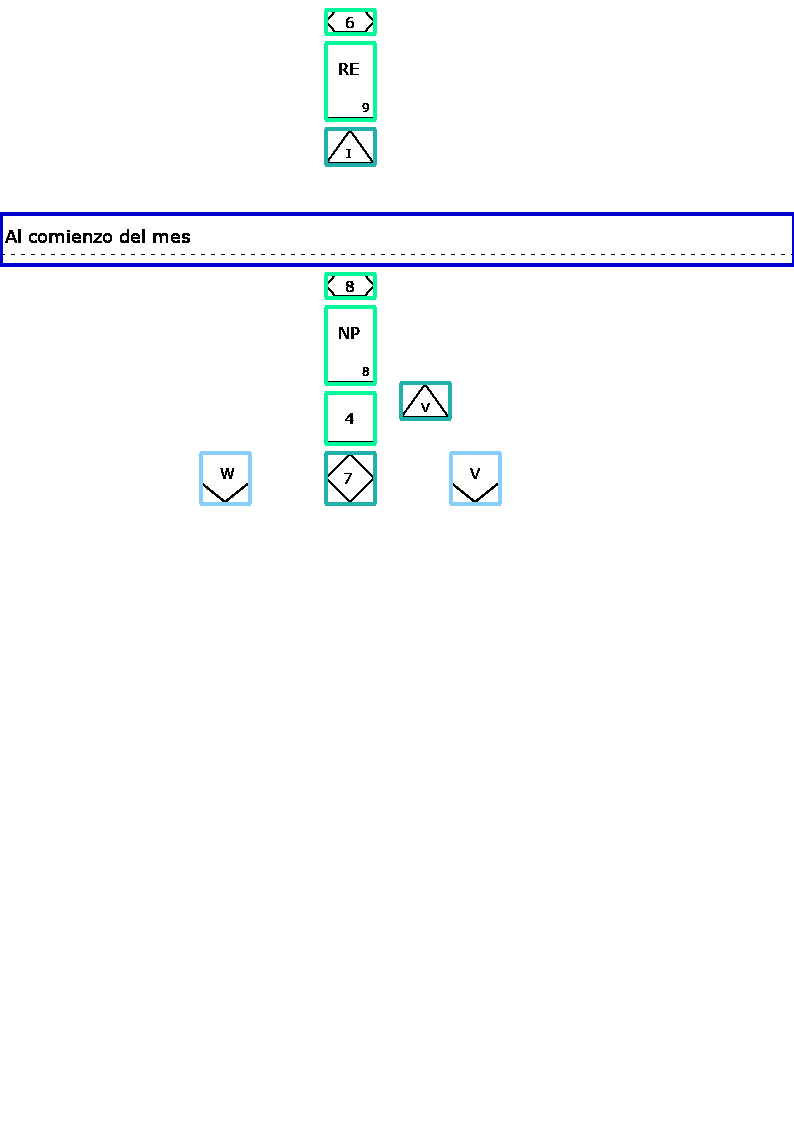



 1324 >  c_SPRC_00024f.xml


 1325 >  c_SPRC_00025f.xml


 1326 >  c_SPRC_00026s.xml


 1327 >  c_SPRC_00027fr.xml


 1328 >  c_SPRC_00028.xml


 1329 >  c_SPRC_00029s.xml


 1330 >  c_SPRC_00030.xml


 1331 >  c_SPRC_00031r.xml


 1332 >  c_SPRC_00032f.xml


 1333 >  c_SPRC_00033fr.xml


 1334 >  c_SPRC_00034f.xml


 1335 >  c_SPRC_00035fr.xml


 1336 >  c_SPRC_00036fs.xml


 1337 >  c_SPRC_00037s.xml


 1338 >  c_SPRC_00038fs.xml


 1339 >  c_SPRC_00039s.xml


 1340 >  c_SPRC_00040f.xml


 1341 >  c_SPRC_00041.xml


 1342 >  c_SPRC_00042r.xml


 1343 >  c_SPRC_00043.xml


 1344 >  c_SPRC_00044f.xml


 1345 >  c_SPRC_00045r.xml


 1346 >  c_SPRC_00046.xml


 1347 >  c_SPRC_00047fr.xml


 1348 >  c_SPRC_00048r.xml


 1349 >  c_SPRC_00049fs.xml


 1350 >  c_SPRC_00050.xml


 1351 >  c_SPRC_00051f.xml


 1352 >  c_SPRC_00052fr.xml


 1353 >  c_SPRC_00053fs.xml


 1354 >  c_SPRC_00054fr.xml


 1355 >  c_SPRC_00055.xml


 1356 >  c_SPRC_00056fr.xml


 1357 >  c_SPRC_00057fr.xml


 1358 >

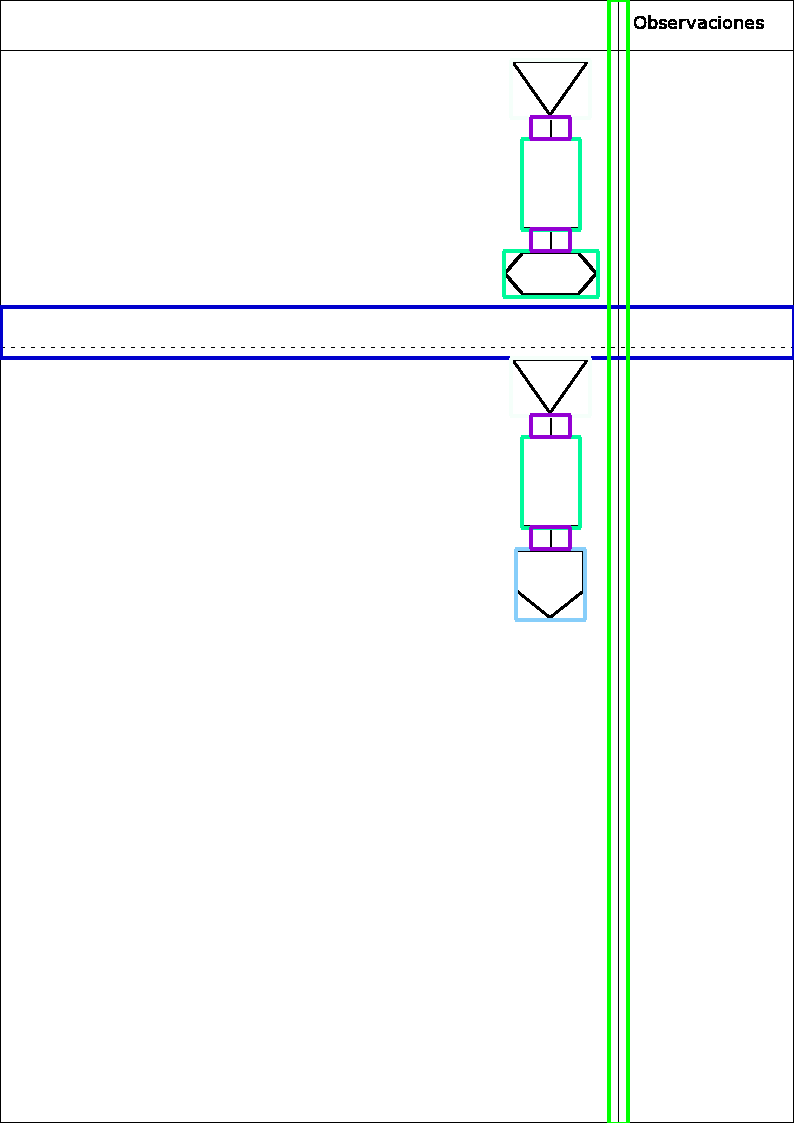



 1463 >  c_SPRV_00033fs.xml


 1464 >  c_SPRV_00034fr.xml


 1465 >  c_SPRV_00035f.xml


 1466 >  c_SPRV_00036r.xml


 1467 >  c_SPRV_00037f.xml


 1468 >  c_SPRV_00038r.xml


 1469 >  c_SPRV_00039f.xml


 1470 >  c_SPRV_00040f.xml


 1471 >  c_SPRV_00041.xml


 1472 >  c_SPRV_00042r.xml


 1473 >  c_SPRV_00043s.xml


 1474 >  c_SPRV_00044r.xml


 1475 >  c_SPRV_00045f.xml


 1476 >  c_SPRV_00046r.xml


 1477 >  c_SPRV_00047s.xml


 1478 >  c_SPRV_00048r.xml


 1479 >  c_SPRV_00049fs.xml


 1480 >  c_SPRV_00050f.xml


 1481 >  c_SPRV_00051f.xml


 1482 >  c_SPRV_00052f.xml


 1483 >  c_SPRV_00053fr.xml


 1484 >  c_SPRV_00054.xml


 1485 >  c_SPRV_00055fr.xml


 1486 >  c_SPRV_00056fr.xml


 1487 >  c_SPRV_00057f.xml


 1488 >  c_SPRV_00058f.xml


 1489 >  c_SPRV_00059fr.xml


 1490 >  c_SPRV_00060fr.xml


 1491 >  c_SPRV_00061r.xml


 1492 >  c_SPRV_00062f.xml


 1493 >  c_SPRV_00063fr.xml


 1494 >  c_SPRV_00064.xml


 1495 >  c_SPRV_00065f.xml


 1496 >  da_c_SARA_00002r-ev85.xml


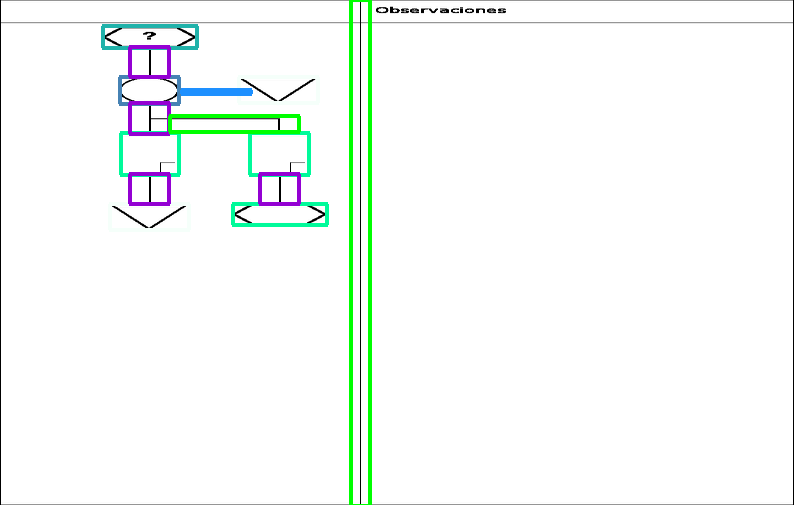



 2361 >  da_c_SFcRV_00035r-ev65.xml


 2362 >  da_c_SFcRV_00035r-nsp.xml


 2363 >  da_c_SFcRV_00036s-ev60.xml


 2364 >  da_c_SFcRV_00037fs-eh50.xml


 2365 >  da_c_SFcRV_00037fs-ng.xml


 2366 >  da_c_SFcRV_00037fs-z45.xml


 2367 >  da_c_SFcRV_00038s-z50.xml


 2368 >  da_c_SFcRV_00040fs-ev90.xml
** da_c_SFcRV_00040fs-ev90.xml - [ proceso , (325, 198, 375, 220) ] error registro duplicado con [ proceso , (325, 198, 375, 220) ].


 2369 >  da_c_SFcRV_00041r-ev65.xml
** da_c_SFcRV_00041r-ev65.xml - [ trasladoDeInformacion_vertical , (329, 372, 369, 379) ] error registro duplicado con [ trasladoDeInformacion_vertical , (329, 372, 369, 379) ].


 2370 >  da_c_SFcRV_00041r-ng.xml
** da_c_SFcRV_00041r-ng.xml - [ trasladoDeInformacion_vertical , (329, 574, 369, 585) ] error registro duplicado con [ trasladoDeInformacion_vertical , (329, 574, 369, 585) ].


 2371 >  da_c_SFcRV_00041r-z65.xml
** da_c_SFcRV_00041r-z65.xml - [ trasladoDeInformacion_vertical , (213, 372, 239, 379) ] error regi

In [5]:
#@title Probar XML

# vuelve a ordenar la lista para mostrar bien
all_xml_array.sort()

# arma hash para contar tipo objetos
diccTipoObjCant = {}

# función para cálculo de Intersection over Union (IoU) 
def calc_IoU( gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt = gt_bbox
    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p = pred_bbox
    
    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt> y_bottomright_gt):
        #raise AssertionError("Ground Truth Bounding Box is not correct")
        return -1
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p> y_bottomright_p):
        #raise AssertionError("Predicted Bounding Box is not correct",x_topleft_p, x_bottomright_p,y_topleft_p,y_bottomright_gt)
        return -1
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
   
    return intersection_area/union_area


# función auxiliar para hacer el chequeo
def checkValoresXML(valMin, valMax, limiteMax, descVal, xml_file, class_name):
  res = 0
  
  if valMin < 0:
    print("**", xml_file, '-', class_name, 'error: ', descVal, 'min [', valMin, '] < 0')
    res = res + 1
  
  if valMax < 0:
    print("**", xml_file, '-', class_name, 'error: ', descVal, 'max [', valMax, '] < 0')
    res = res + 1

  if valMin > limiteMax:
    print("**", xml_file, '-', class_name, 'error: ', descVal, 'min [', valMin, '] > límiteMáximo [', limiteMax, '].')
    res = res + 1
  
  if valMax > limiteMax:
    print("**", xml_file, '-', class_name, 'error: ', descVal, 'max [', valMax, ']  > límiteMáximo [', limiteMax, '].')
    res = res + 1

  if valMin < 0:
    print("**", xml_file, '-', class_name, 'error: ', descVal, 'min [', valMin, '] < 0.')
    res = res + 1
  
  if valMax < 0:
    print("**", xml_file, '-', class_name, 'error: ', descVal, 'max [', valMax, '] < 0.')
    res = res + 1

  if valMin >= valMax:
      if valMin > valMax:
          print("**", xml_file, '-', class_name, 'error: ', descVal, 'min [', valMin, '] > ', descVal, 'max [', valMax, '].')
          res = res + 1
      else:
          print("**", xml_file, '-', class_name, 'error: ', descVal, 'min [', valMin, '] = ', descVal, 'max[', valMax, '].')
          res = res + 1
  
  return res

# variable auxiliar
xmlConError = []
cantErroresTotales = 0
cantProcesados = 0 
# procesa los XMLs
for xml_file in all_xml_array:
    # variables auxiliares para chequear duplicados
    auxListCheckDupPos = []
    auxListCheckDupClass = []
    cantErrores = 0
    
    cantProcesados = cantProcesados + 1
    print("\n\n", cantProcesados,"> ", xml_file)
    if not os.path.isfile(data_dir_path + '/' + xml_file):
      print("\tno se encuentra el archivo xml!")
      continue    

    # decide si muestra la imagen asociada a este XML
    muestraImagen = ((xml_file in mostrar_xml_array) and mostrarObjetosEnImagen)

    # carga la info del XML original
    et = ET.parse(data_dir_path + '/' + xml_file)
    element = et.getroot()
    element_objs = element.findall('object') 
    element_filename = element.find('filename').text
    xmlWidth = element.find('size').find('width').text 
    xmlHeight = element.find('size').find('height').text 
    ##if not('.png' in element_filename):
    ##    element_filename  = element_filename + '.png'
    img_filename = os.path.join(image_dir_path, element_filename)
    if not os.path.isfile(img_filename):
      print("\tno se encuentra la imagen ", img_filename, "!")
      continue 

    if muestraImagen or mostrarImagenOriginal:
      # carga la imagen
      imageCargada = ImPIL.open(img_filename)
      if mostrarImagenOriginal: 
          display( imageCargada )

    # imagen auxiliar para mostrar recuadros y obtener tamaño
    img = tf.io.read_file(img_filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = img.numpy()
    image_pil = Image.fromarray(np.uint8(img)).convert("RGB")    
    im_width, im_height = image_pil.size
    draw = ImageDraw.Draw(image_pil)

    # controla ancho de la imagen y XML
    if xmlWidth=="" or not xmlWidth.isnumeric():
      print("**", xml_file, "- [size->Width] ", xmlWidth, " inválido!") 
      cantErrores = cantErrores + 1
    else:
      if im_width != int(xmlWidth):
        print("**", xml_file, "- [size->Width] ", xmlWidth, " no coincide con ancho de la imagen ", im_width) 
        cantErrores = cantErrores + 1
    # controla alto de la imagen y XML
    if xmlHeight=="" or not xmlHeight.isnumeric():
        print("**", xml_file, "- [size->Height] ", xmlHeight, " inválido!") 
        cantErrores = cantErrores + 1
    else:
      if im_height != int(xmlHeight):
        print("**", xml_file, "- [size->Height] ", xmlHeight, " no coincide con ancho de la imagen ", im_height) 
        cantErrores = cantErrores + 1

    # procesa los elementos en el archivo XML original para generar el nuevo
    for element_obj in element_objs:

        # obtiene la información actual de la imagen
        class_name = element_obj.find('name').text 
        if calcularCantTipoObjetos:
          # cuenta tipo de objeto
          if class_name in diccTipoObjCant:
            diccTipoObjCant[class_name] = diccTipoObjCant[class_name] + 1
          else:
            diccTipoObjCant[class_name] = 1

        # obtiene info del box actual
        obj_bbox = element_obj.find('bndbox')
        x1 = int(round(float(obj_bbox.find('xmin').text)))
        y1 = int(round(float(obj_bbox.find('ymin').text)))
        x2 = int(round(float(obj_bbox.find('xmax').text)))
        y2 = int(round(float(obj_bbox.find('ymax').text)))

        # realiza el chequeo del XML
        cantErrores = checkValoresXML(x1, x2, im_width, 'X', xml_file, class_name) + cantErrores
        cantErrores = checkValoresXML(y1, y2, im_height, 'Y', xml_file, class_name) + cantErrores         
        
        # controla que no haya duplicados identicos
        auxVec = (x1, y1, x2, y2)        
        if auxVec in auxListCheckDupPos:
            i = auxListCheckDupPos.index( auxVec )
            print("**", xml_file, '- [', class_name, ',', auxVec, '] error registro duplicado con [', auxListCheckDupClass[i], ',', auxListCheckDupPos[i], '].')
            cantErrores = cantErrores + 1
        else:
            # controla que no haya alguno con coordenadas muy parecidas
            if revisarObjetosEncimados:
                i = 0
                while i < len(auxListCheckDupPos):
                  iou = calc_IoU(auxVec, auxListCheckDupPos[i])
                  if iou >= 0.90:
                    print("**", xml_file, '- [', class_name, ',', auxVec, '] error posiciones muy cercanas (IoU ', iou, ') con [', auxListCheckDupClass[i], ',', auxListCheckDupPos[i], '].')
                    cantErrores = cantErrores + 1                    
                    break
                  i = i + 1                  
            # lo agrega a la lista            
            auxListCheckDupPos.append( auxVec )
            auxListCheckDupClass.append( class_name )
        
        if muestraImagen and extraerObjetos:
            # extrae los objetos de la imagen
            print("  --- ", class_name)  
            imBox = imageCargada.crop((x1,y1,x2,y2))
            display( imBox )

        if muestraImagen:
            # genera los recuadros correspondientes
            color = colors[(hash(class_name)) % len(colors)]
            if color == "#ffffff":
              color = "#000000"
            draw.line([(x1, y1), (x1, y2), (x2, y2), (x2, y1), (x1, y1)], width=4, fill=color)
             
    if cantErrores > 0:
      xmlConError.append( xml_file )
    ##print("\n== Cantidad de Errores encontrados: ", cantErrores)
    cantErroresTotales = cantErroresTotales + cantErrores 
    
    if muestraImagen:
       # muestra la imagen con los recuadros correspondientes
       ##np.copyto(img, np.array(image_pil))
       print("\n")
       imMostrar = Image.fromarray(np.array(image_pil), 'RGB')
       display( imMostrar )

print("\n\n== Cantidad de XMLs chequeados: ", cantProcesados)
print("\n== Cantidad de Errores Totales encontrados: ", cantErroresTotales)
print("\n== XMLs con errores: ", xmlConError)



In [6]:
#@title Muestra Cantidades por Tipo de Objeto

if calcularCantTipoObjetos:
  # calcula cantidad total
  cantTotal = 0
  for obj in diccTipoObjCant.keys():
    cantTotal = cantTotal +  diccTipoObjCant[obj] 
  if cantTotal == 0:
    print("= NO SE ENCUENTRAN OBJETOS!")
  else:  
    # muestra cuenta tipo de objeto
    print("\n\n== Cantidad de Tipos de Objetos encontrados: ")
    for obj in sorted(diccTipoObjCant.keys()):
      porc = round(diccTipoObjCant[obj]*100/cantTotal, 2) 
      print("\t\t", obj, ": ", diccTipoObjCant[obj], "(", porc, "%)")
    print("\n\t\t== TOTAL: ", cantTotal)
  print("\n")



== Cantidad de Tipos de Objetos encontrados: 
		 actualizacionLogica_flecha :  561 ( 1.51 %)
		 archivoDefinitivo :  1107 ( 2.97 %)
		 archivoTransitorio :  2312 ( 6.21 %)
		 conector_comienzoCorte :  2712 ( 7.28 %)
		 conector_reanudacionCorte :  472 ( 1.27 %)
		 consultaLogica_flecha :  805 ( 2.16 %)
		 control :  837 ( 2.25 %)
		 decision :  618 ( 1.66 %)
		 demora :  217 ( 0.58 %)
		 destruccion :  435 ( 1.17 %)
		 documento :  5109 ( 13.72 %)
		 documentoElectronico :  296 ( 0.79 %)
		 documentoMultCopias :  462 ( 1.24 %)
		 operacion :  1785 ( 4.79 %)
		 proceso :  2124 ( 5.7 %)
		 procesoNoRelevado :  2356 ( 6.33 %)
		 separador_area_externa :  532 ( 1.43 %)
		 separador_area_interna :  2907 ( 7.81 %)
		 temporalidad :  599 ( 1.61 %)
		 trasladoDeInformacion :  505 ( 1.36 %)
		 trasladoDeInformacion_horizontal :  1029 ( 2.76 %)
		 trasladoDeInformacion_vertical :  9463 ( 25.41 %)

		== TOTAL:  37243




In [10]:
#@title OPCIONAL: Eliminar casos con problemas
# nota: se debe copiar la lista de xml obtenida de la ejecución anterior
borrarCasosProblemas = False #@param {type:"boolean"}

if borrarCasosProblemas:
  arBorrar =  []
  for ar in arBorrar:
    print(ar)
    os.remove(  data_dir_path + '/' + ar)
    os.remove(  image_dir_path + '/' + ar.replace(".xml", ".png"))
  print("Casos eliminados: ", len(arBorrar))